In [1]:
import cn_utils
import Poetry

import numpy as np
import matplotlib.pyplot as plt

from cs231n.gradient_check import eval_numerical_gradient, eval_numerical_gradient_array
from cs231n.rnn_layers import *
from cs231n.captioning_solver import CaptioningSolver
from cs231n.classifiers.rnn import CaptioningRNN
from cs231n.coco_utils import load_coco_data, sample_coco_minibatch, decode_captions
from cs231n.image_utils import image_from_url
%load_ext autoreload
%autoreload 2


In [75]:
poetries = cn_utils.readFile('./poetry')

word_to_idx, idx_to_word = cn_utils.get_idx_and_words(poetries)

encodec_poetry = cn_utils.encodePoetry(poetries[0],word_to_idx)

decoded_poetry = cn_utils.decodePoetry(encodec_poetry,idx_to_word)


all files:
['luchai.txt', 'zhongnanwangyuxue.txt', 'denghuanghelou.txt', 'chunxiao.txt', 'zashi.txt', 'jingyesi.txt', 'xiangsi.txt']
reading file:  ./poetry/luchai.txt
鹿柴
stt空山不见人，但闻人语响。返影入深林，复照青苔上。end
----- reading finished -----


reading file:  ./poetry/zhongnanwangyuxue.txt
终南望余雪
stt终南阴岭秀，积雪浮云端。林表明霁色，城中增暮寒。end
----- reading finished -----


reading file:  ./poetry/denghuanghelou.txt
登鹳雀楼
stt白日依山尽，黄河入海流。欲穷千里目，更上一层楼。end
----- reading finished -----


reading file:  ./poetry/chunxiao.txt
春晓
stt春眠不觉晓，处处闻啼鸟。夜来风雨声，花落知多少。end
----- reading finished -----


reading file:  ./poetry/zashi.txt
杂诗
stt君自故乡来，应知故乡事。来日绮窗前，寒梅著花未。end
----- reading finished -----


reading file:  ./poetry/jingyesi.txt
静夜思
stt床前明月光，疑是地上霜。举头望明月，低头思故乡。end
----- reading finished -----


reading file:  ./poetry/xiangsi.txt
相思
stt红豆生南国，春来发几枝。愿君多采撷，此物最相思。end
----- reading finished -----




In [76]:
encoded_poetries = []
for pt in poetries:
    encoded_poetries.append(cn_utils.encodePoetry(pt, word_to_idx))

In [77]:
import poetry_utils
data = {}
data = poetry_utils.generate_data(encoded_poetries, data)

Automatic pdb calling has been turned ON
(7, 20) (7, 100)
(Iteration 1 / 100) loss: 120.344428
(Iteration 11 / 100) loss: 80.815438
(Iteration 21 / 100) loss: 50.152404
(Iteration 31 / 100) loss: 36.567201
(Iteration 41 / 100) loss: 25.958677
(Iteration 51 / 100) loss: 19.657507
(Iteration 61 / 100) loss: 15.094927
(Iteration 71 / 100) loss: 13.667380
(Iteration 81 / 100) loss: 12.790111
(Iteration 91 / 100) loss: 12.386897


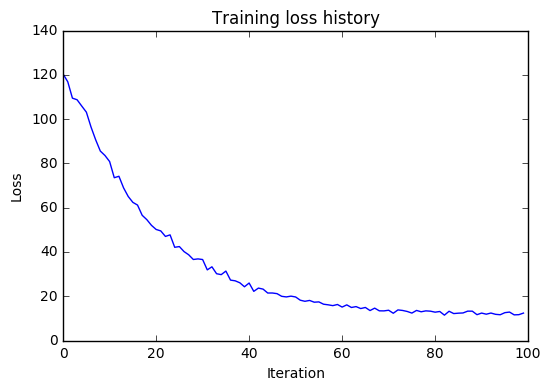

In [96]:
%pdb on
small_data = data
print data['train_features'].shape,data['train_captions'].shape
small_rnn_model = CaptioningRNN(
          cell_type='lstm',
          word_to_idx=word_to_idx,
          input_dim=data['train_features'].shape[1],
          hidden_dim=512,
          wordvec_dim=256,
        )

small_rnn_solver = CaptioningSolver(small_rnn_model, small_data,
           update_rule='adam',
           num_epochs=100,
           batch_size=25,
           optim_config={
             'learning_rate': 5e-3,
           },
           lr_decay=0.95,
           verbose=True, print_every=10,
         )

small_rnn_solver.train()

# Plot the training losses
plt.plot(small_rnn_solver.loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training loss history')
plt.show()

In [97]:
sample_captions = small_rnn_model.sample(data['train_features'])

In [98]:
first = cn_utils.decodeChinese(sample_captions[0], idx_to_word)
second = cn_utils.decodeChinese(sample_captions[1], idx_to_word)

In [108]:
print data['train_features'][0]

[ 3.  4.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]


In [110]:
print cn_utils.decodeChinese(data['train_features'][0].astype(int), idx_to_word), '\n', first
print cn_utils.decodeChinese(data['train_features'][1].astype(int), idx_to_word), '\n', second

鹿柴blkblkblkblkblkblkblkblkblkblkblkblkblkblkblkblkblkblk 
stt空山不见人，但闻人语响。返影入深林，复照青苔上。endendend霁色
终南望余雪blkblkblkblkblkblkblkblkblkblkblkblkblkblkblk 
stt终南阴岭秀，积雪浮云端。林表明霁色，城中增暮寒。endendend霁，


In [101]:
wuti = small_rnn_model.sample(np.ones((1,20)) * 0)

In [102]:
wotu_cn = cn_utils.decodeChinese(wuti[0], idx_to_word)

In [103]:
print wotu_cn

stt乡。endendend目，更一层楼。endendend霁，，城中增暮寒。endendend霁，
